In [1]:
import requests
import pandas
import matplotlib.pyplot as plt
# import numpy as np
import scipy.stats as st

import seaborn as sns    #You will need to install seaborn for this graph https://seaborn.pydata.org/installing.html
import time
from datetime import date

In [2]:
# Years to be input into the API request
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
yearCount = 0
API_Limit = 500000
# Dictionary to store DataFrames for each given year
dataframes = dict.fromkeys(years)

In [3]:
# Lists to store value_counts data
theft_values = []
theft_norms = []
decpra_values = []
decpra_norms = []
tres_values = []
tres_norms = []
batt_values = []
batt_norms = []
dam_values = []
dam_norms = []
assault_values = []
assault_norms = []
prost_values = []
prost_norms = []
narc_values = []
narc_norms = []
robb_values = []
robb_norms = []
ppv_values = []
ppv_norms = []
burg_values = []
burg_norms = []
llv_values = []
llv_norms = []
iwpo_values = []
iwpo_norms = []
homi_values = []
homi_norms = []
sa_values = []
sa_norms = []
mvtheft_values = []
mvtheft_norms = []
other_values = []
other_norms = []
arson_values = []
arson_norms = []
so_values = []
so_norms = []
intim_values = []
intim_norms = []
wv_values = []
wv_norms = []
oic_values = []
oic_norms = []
pi_values = []
pi_norms = []
stalk_values = []
stalk_norms = []
kidn_values = []
kidn_norms= []
cclv_values = []
cclv_norms = []
obs_values = []
obs_norms = []
csa_values = []
csa_norms= []
nocrim_values = []
nocrim_norms = []
nocrim_values = []

In [4]:
# API request for given year (1,000,000 records) into cleaned DataFrame
def getCrimeData(year, yearCount):
    request = requests.get(f'https://data.cityofchicago.org/resource/ijzp-q8t2.json?$limit={API_Limit}&year={year}').json()
    df = pandas.DataFrame.from_records(request)
    print(f'\n{year} Pre-Filter Count: {len(df)}')
    df = df.drop(['case_number', 'domestic', 'beat', 'district', 'ward', 'fbi_code', 'updated_on', 'x_coordinate', 'y_coordinate', 'community_area', 'arrest'], axis = 1)
    df = df.dropna()
    df = df[(df.longitude>='-87.6226')&(df.longitude<='-87.6260')&(df.latitude>='41.88843809')&(df.latitude<='41.90051916')]
    dataframes[year] = df
    print(f'    Post-Filter Count: {len(df)}')     

    # CC added Tom's bar charts (Oct28)
    top_10_list = df.groupby(["iucr","primary_type","description"]).count()
    top_10_df = pandas.DataFrame(top_10_list)
    top_10_df.rename(columns = {'id':'count'}, inplace = True) 
    top_10_df.reset_index(drop=False,inplace=True)
    top_10_df.sort_values(by=['count'], ascending = False, inplace = True)
    top_10_df = top_10_df.head(10)
    top_10_df.sort_values(by=["iucr"], ascending = True, inplace = True)
    offenses=top_10_df["primary_type"]+" / "+top_10_df["description"]
    plt.title("Top 10 Offenses for " + str(year))
    plt.xlabel("Criminal Offense")
    plt.ylabel("Criminal Offense Count")
    plt.bar(offenses, top_10_df["count"], color='b', align="center")
    plt.xticks(rotation=60,horizontalalignment='right')
    plt.figure(figsize=[10,4.8])
    plt.savefig(".\output\\" + str(year) + "Top10_Offenses.png")
    # End of TOm's stuff (Oct28)

    df.to_csv('.\output\\' + str(year) + 'CrimeData.csv', index = False) 
    # Start and append to "All" records csv
    if yearCount == 0:
        df.to_csv('.\output\All_CrimeData.csv', index = False) 
    else:
        df.to_csv('.\output\All_CrimeData.csv', mode='a', header=False, index = False) 


2010 Pre-Filter Count: 370397
    Post-Filter Count: 1876

2011 Pre-Filter Count: 351878
    Post-Filter Count: 1946

2012 Pre-Filter Count: 336142
    Post-Filter Count: 1901

2013 Pre-Filter Count: 307303
    Post-Filter Count: 1664

2014 Pre-Filter Count: 275554
    Post-Filter Count: 1555

2015 Pre-Filter Count: 264453
    Post-Filter Count: 1579

2016 Pre-Filter Count: 269462
    Post-Filter Count: 1833

2017 Pre-Filter Count: 268683
    Post-Filter Count: 2196

2018 Pre-Filter Count: 268227
    Post-Filter Count: 2232

2019 Pre-Filter Count: 260378
    Post-Filter Count: 2099

Number of years processed: 10


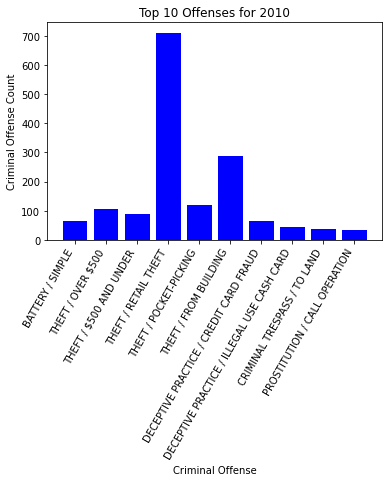

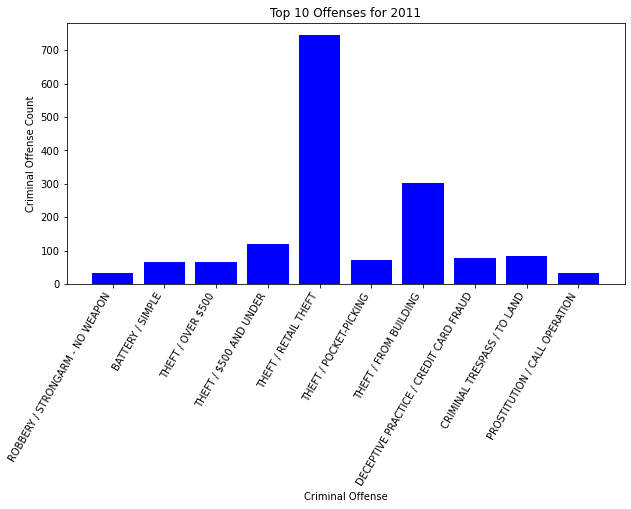

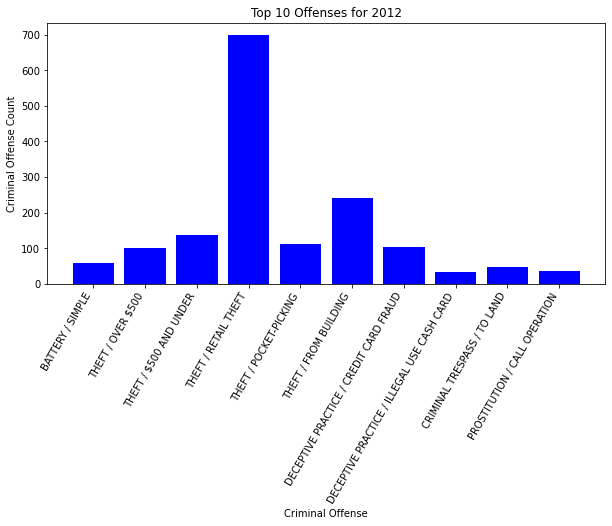

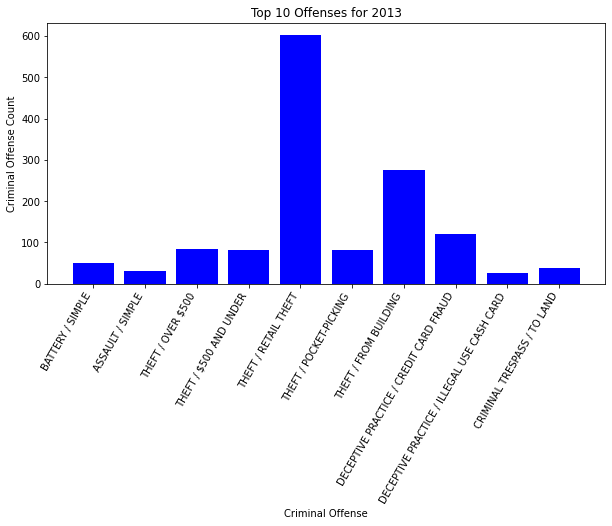

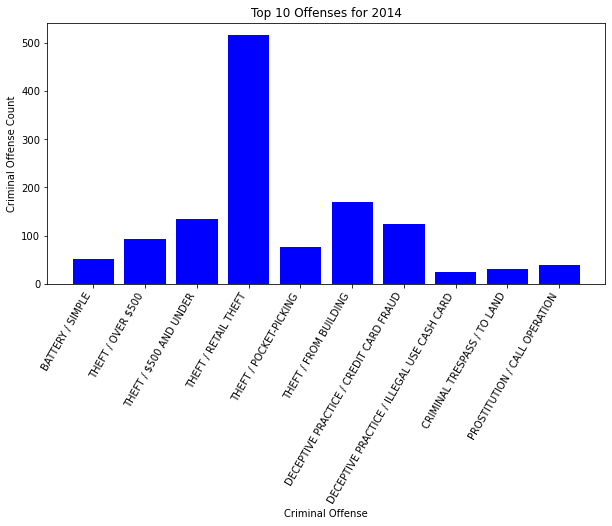

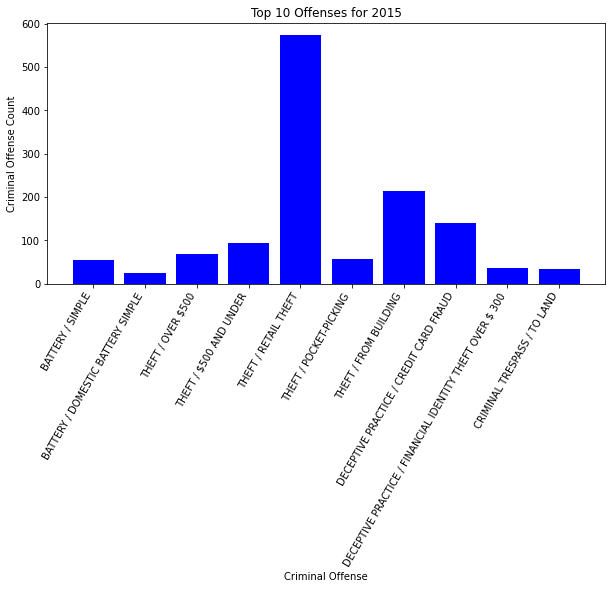

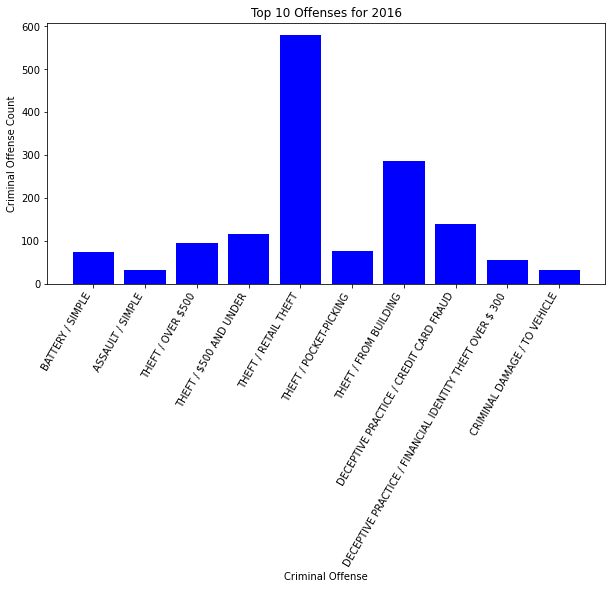

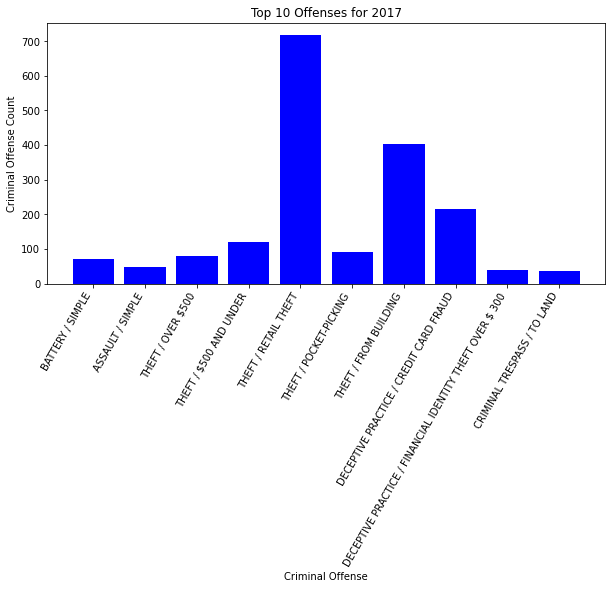

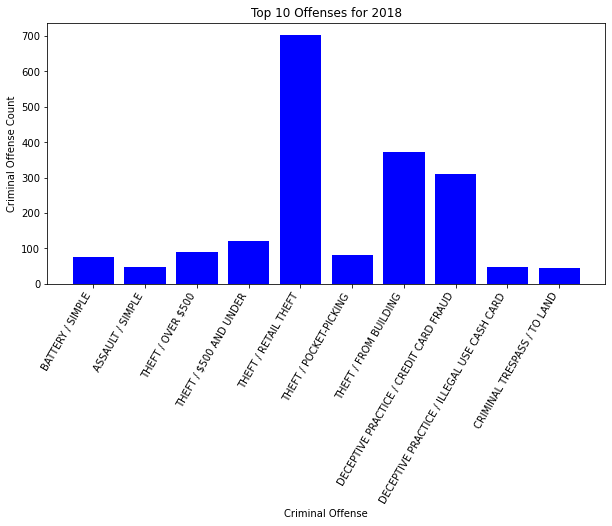

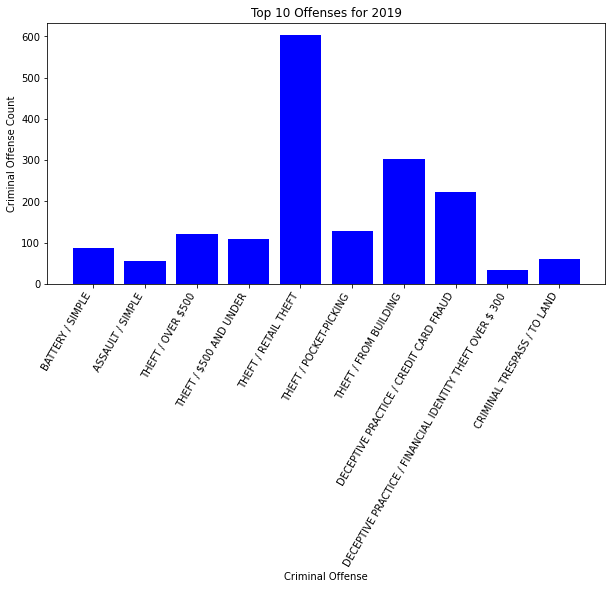

<Figure size 720x345.6 with 0 Axes>

In [5]:
# For loop that iterates through given years; creatings csv file, DataFrame
for year in years:
    getCrimeData(year, yearCount)
    yearCount +=1
print(f'\nNumber of years processed: {yearCount}')

In [6]:
# Isolates value_counts data(count and normalized) into respepctive lists    
for dataframe in dataframes:
    val = dataframes[dataframe]['primary_type'].value_counts()
    norm = dataframes[dataframe]['primary_type'].value_counts(normalize = True)
    norm = round((norm * 100), 2)
    
    try:
        theft_values.append(val['THEFT'])
        theft_norms.append(norm['THEFT'])
    except Exception:
        theft_values.append(0)
        theft_norms.append(0)
    try:
        decpra_values.append(val['DECEPTIVE PRACTICE'])
        decpra_norms.append(norm['DECEPTIVE PRACTICE'])
    except Exception:
        decpra_values.append(0)
        decpra_norms.append(0)
    try:
        tres_values.append(val['CRIMINAL TRESPASS'])
        tres_norms.append(norm['CRIMINAL TRESPASS'])
    except Exception:
        tres_values.append(0)
        tres_norms.append(0)
    try:
        batt_values.append(val['BATTERY'])
        batt_norms.append(norm['BATTERY'])
    except Exception:
        batt_values.append(0)
        batt_norms.append(0)
    try:
        dam_values.append(val['CRIMINAL DAMAGE'])
        dam_norms.append(norm['CRIMINAL DAMAGE'])
    except Exception:
        dam_values.append(0)
        dam_norms.append(0)
    try:
        assault_values.append(val['ASSAULT'])
        assault_norms.append(norm['ASSAULT'])
    except Exception:
        assault_values.append(0)
        assault_norms.append(0)
    try:
        prost_values.append(val['PROSTITUTION'])
        prost_norms.append(norm['PROSTITUTION'])
    except Exception:
        prost_values.append(0)
        prost_norms.append(0)
    try:
        narc_values.append(val['NARCOTICS'])
        narc_norms.append(norm['NARCOTICS'])
    except Exception:
        narc_values.append(0)
        narc_norms.append(0)
    try:
        robb_values.append(val['ROBBERY'])
        robb_norms.append(norm['ROBBERY'])
    except Exception:
        robb_values.append(0)
        robb_norms.append(0)
    try:
        ppv_values.append(val['PUBLIC PEACE VIOLATION'])
        ppv_norms.append(norm['PUBLIC PEACE VIOLATION'])
    except Exception:
        ppv_values.append(0)
        ppv_norms.append(0)
    try:
        burg_values.append(val['BURGLARY'])
        burg_norms.append(norm['BURGLARY'])
    except Exception:
        burg_values.append(0)
        burg_norms.append(0)
    try:
        llv_values.append(val['LIQUOR LAW VIOLATION'])
        llv_norms.append(norm['LIQUOR LAW VIOLATION'])
    except Exception:
        llv_values.append(0)
        llv_norms.append(0)
    try:
        iwpo_values.append(val['INTERFERENCE WITH PUBLIC OFFICER'])
        iwpo_norms.append(norm['INTERFERENCE WITH PUBLIC OFFICER'])
    except Exception:
        iwpo_values.append(0)
        iwpo_norms.append(0)
    try:
        homi_values.append(val['HOMICIDE'])
        homi_norms.append(norm['HOMICIDE'])
    except Exception:
        homi_values.append(0)
        homi_norms.append(0)
    try:
        sa_values.append(val['CRIMINAL SEXUAL ASSAULT'])
        sa_norms.append(norm['CRIMINAL SEXUAL ASSAULT'])
    except Exception:
        sa_values.append(0)
        sa_norms.append(0)
    try:
        mvtheft_values.append(val['MOTOR VEHICLE THEFT'])
        mvtheft_norms.append(norm['MOTOR VEHICLE THEFT'])
    except Exception:
        mvtheft_values.append(0)
        mvtheft_norms.append(0)
    try:
        other_values.append(val['OTHER OFFENSE'])
        other_norms.append(norm['OTHER OFFENSE'])
    except Exception:
        other_values.append(0)
        other_norms.append(0)
    try:
        arson_values.append(val['ARSON'])
        arson_norms.append(norm['ARSON'])
    except Exception:
        arson_values.append(0)
        arson_norms.append(0)       
    try:
        so_values.append(val['SEX OFFENSE'])
        so_norms.append(norm['SEX OFFENSE'])
    except Exception:
        so_values.append(0)
        so_norms.append(0)
    try:
        intim_values.append(val['INTIMIDATION'])
        intim_norms.append(norm['INTIMIDATION'])
    except Exception:
        intim_values.append(0)
        intim_norms.append(0)
    try:
        wv_values.append(val['WEAPONS VIOLATION'])
        wv_norms.append(norm['WEAPONS VIOLATION'])
    except Exception:
        wv_values.append(0)
        wv_norms.append(0)
    try:
        oic_values.append(val['OFFENSE INVOLVING CHILDREN'])
        oic_norms.append(norm['OFFENSE INVOLVING CHILDREN'])
    except Exception:
        oic_values.append(0)
        oic_norms.append(0)
    try:
        pi_values.append(val['PUBLIC INDECENY'])
        pi_norms.append(norm['PUBLIC INDECENY'])
    except Exception:
        pi_values.append(0)
        pi_norms.append(0)
    try:
        stalk_values.append(val['STALKING'])
        stalk_norms.append(norm['STALKING'])
    except Exception:
        stalk_values.append(0)
        stalk_norms.append(0)    
    try:
        kidn_values.append(val['KIDNAPPING'])
        kidn_norms.append(norm['KIDNAPPING'])
    except Exception:
        kidn_values.append(0)
        kidn_norms.append(0)  
    try:
        cclv_values.append(val['CONCEALED CARRY LICENSE VIOLATION'])
        cclv_norms.append(norm['CONCEALED CARRY LICENSE VIOLATION'])
    except Exception:
        cclv_values.append(0)
        cclv_norms.append(0)  
    try:
        obs_values.append(val['OBSCENITY'])
        obs_norms.append(norm['OBSCENITY'])
    except Exception:
        obs_values.append(0)
        obs_norms.append(0)  
    try:
        csa_values.append(val['CRIM SEXUAL ASSAULT'])
        csa_norms.append(norm['CRIM SEXUAL ASSAULT'])
    except Exception:
        csa_values.append(0)
        csa_norms.append(0)
    try:
        nocrim_values.append(val['NON-ASSAULT'])
        nocrim_norms.append(norm['NON-ASSAULT'])
    except Exception:
        nocrim_values.append(0)
        nocrim_norms.append(0)

In [31]:
# Column titles for DataFrame (matches primary_type)        
crimes = 'THEFT', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'PROSTITUION', 'NARCOTICS', 'ROBBERY', 'PUBLIC PEACE VIOLATION', 'BURGLARY', 'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'ARSON', 'SEX OFFENSE', 'INTIMITDATION', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC INDECENCY', 'STALKING', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY', 'CRIM SEXUAL ASSAULT', 'NON-CRIMINAL', 'OTHER OFFENSE'

# Value_count() integer data     
values_data = (theft_values, decpra_values, tres_values, batt_values, dam_values, assault_values, prost_values, narc_values, 
               robb_values, ppv_values, burg_values, llv_values, iwpo_values, homi_values, sa_values, mvtheft_values, 
               arson_values, so_values, intim_values, wv_values, oic_values, pi_values, stalk_values, kidn_values, cclv_values, 
               obs_values, csa_values, nocrim_values, other_values)

# Value_count() normalized (percentage) data   
norms_data = (theft_norms, decpra_norms, tres_norms, batt_norms, dam_norms, assault_norms, prost_norms, narc_norms, robb_norms, 
              ppv_norms, burg_norms, llv_norms, iwpo_norms, homi_norms, sa_norms, mvtheft_norms, arson_norms, so_norms, 
              intim_norms, wv_norms, oic_norms, pi_norms, stalk_norms, kidn_norms, cclv_norms, obs_norms, csa_norms, 
              nocrim_norms, other_norms)

# Integer DataFrame
valuesDF = pandas.DataFrame(values_data, columns = years)
valuesDF['Crime'] = crimes
valuesDF = valuesDF.set_index('Crime')

# Normalized DataFrame
normsDF = pandas.DataFrame(norms_data, columns = years)
normsDF['Crime'] = crimes
normsDF = normsDF.set_index('Crime')

print(valuesDF)
print(normsDF)

                                   2010  2011  2012  2013  2014  2015  2016  \
Crime                                                                         
THEFT                              1351  1356  1344  1159  1004  1014  1165   
DECEPTIVE PRACTICE                  155   152   187   196   232   255   294   
CRIMINAL TRESPASS                    39    84    50    41    31    34    34   
BATTERY                              92    97    83    81    87    93   118   
CRIMINAL DAMAGE                      33    37    33    29    23    41    56   
ASSAULT                              37    28    35    35    25    32    34   
PROSTITUION                          38    35    36    12    40    16     0   
NARCOTICS                             9    22    21     6    19    10     7   
ROBBERY                              39    40    15    19    18    14    22   
PUBLIC PEACE VIOLATION               10    21    25    21     9    11    13   
BURGLARY                              9    11    17 

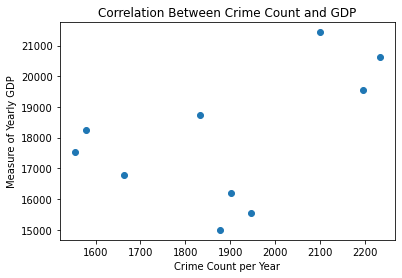

The correlation between crime and GDP is 0.49


In [7]:
#Tom's code 
gdp_data_df = pandas.read_csv('./SourceData/GDP_year.csv')
crime_df = pandas.read_csv('./output/All_CrimeData.csv')

crime_counts=crime_df.groupby(["year"]).count()["id"]
crime_gdp_df=pandas.DataFrame({'year':crime_counts.index, "crime counts":crime_counts.values, "GDP":gdp_data_df["GDP"]})
#crime_gdp_df=crime_gdp_df.drop(19)
plt.scatter(crime_gdp_df["crime counts"],crime_gdp_df["GDP"])
plt.title("Correlation Between Crime Count and GDP")
plt.xlabel('Crime Count per Year')
plt.ylabel('Measure of Yearly GDP')
plt.show()

crimes = crime_gdp_df["crime counts"]
gdp = crime_gdp_df["GDP"]
correlation = st.pearsonr(crimes,gdp)
print(f"The correlation between crime and GDP is {round(correlation[0],2)}")

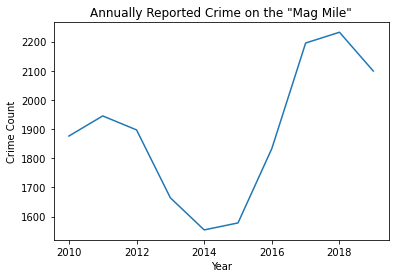

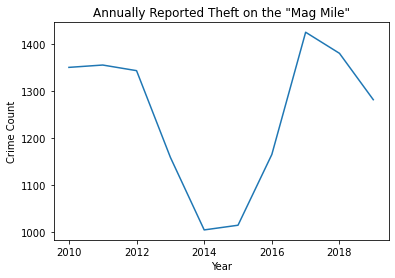

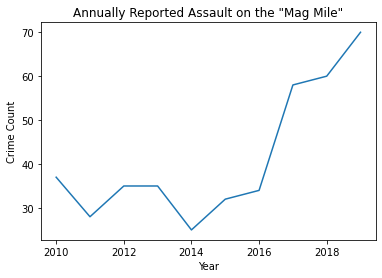

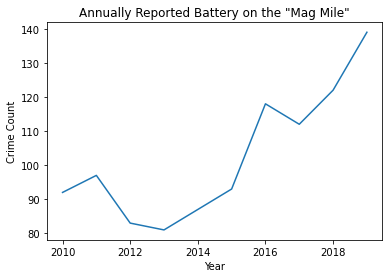

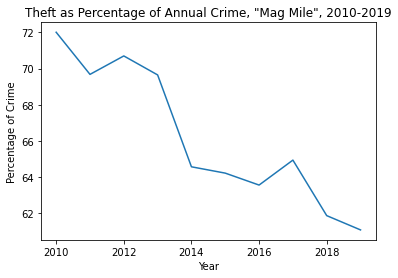

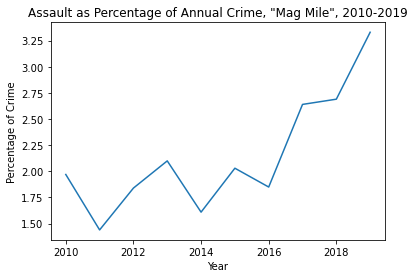

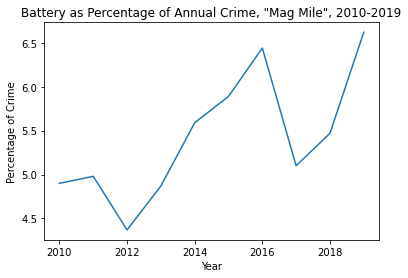

In [33]:
theft_norms = []
assault_norms = []
battery_norms = []
crime_count= []
theft_count = []
assault_count = []
battery_count = []

for norm in normsDF:
    crime_count.append(sum(valuesDF[norm]))
    theft_count.append(valuesDF[norm][0])
    assault_count.append(valuesDF[norm][5])
    battery_count.append(valuesDF[norm][3])       
    theft_norms.append(normsDF[norm][0])
    assault_norms.append(normsDF[norm][5])
    battery_norms.append(normsDF[norm][3])

plt.plot(years, crime_count)
plt.title('Annually Reported Crime on the "Mag Mile"')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

plt.plot(years, theft_count)
plt.title('Annually Reported Theft on the "Mag Mile"')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

plt.plot(years, assault_count)
plt.title('Annually Reported Assault on the "Mag Mile"')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

plt.plot(years, battery_count)
plt.title('Annually Reported Battery on the "Mag Mile"')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

plt.plot(years, theft_norms)
plt.title('Theft as Percentage of Annual Crime, "Mag Mile", 2010-2019')
plt.xlabel('Year')
plt.ylabel('Percentage of Crime')
plt.show()

plt.plot(years, assault_norms)
plt.title('Assault as Percentage of Annual Crime, "Mag Mile", 2010-2019')
plt.xlabel('Year')
plt.ylabel('Percentage of Crime')
plt.show()

plt.plot(years, battery_norms)
plt.title('Battery as Percentage of Annual Crime, "Mag Mile", 2010-2019')
plt.xlabel('Year')
plt.ylabel('Percentage of Crime')
plt.show()

### Gisela's update 10-30-2020

In [23]:
# read csv file in to use for the graphs

dataf = pandas.read_csv('.\output\All_CrimeData.csv')
dataf = dataf[['id','date','block','iucr','primary_type','description','location_description','year','latitude','longitude','location']].sample(frac=1).head(18882).reset_index(drop=True)
dataf

,id,date,block,iucr,primary_type,description,location_description,year,latitude,longitude,location
0,9492084,2014-02-10T11:45:00.000,008XX N MICHIGAN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,2014,41.897895,-87.624097,"{'latitude': '41.897895128', 'longitude': '-87..."
1,8075089,2011-05-21T20:15:00.000,008XX N MICHIGAN AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,2011,41.897369,-87.624154,"{'latitude': '41.897368588', 'longitude': '-87..."
2,8857915,2012-10-23T20:52:00.000,008XX N MICHIGAN AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,2012,41.897297,-87.624162,"{'latitude': '41.897297288', 'longitude': '-87..."
3,8309721,2011-10-15T11:00:00.000,001XX E OHIO ST,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,2011,41.892559,-87.623450,"{'latitude': '41.892559086', 'longitude': '-87..."
4,10628008,2016-08-06T02:50:00.000,007XX N MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,2016,41.895141,-87.624256,"{'latitude': '41.895140898', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...
18876,8797432,2012-09-11T14:30:00.000,004XX N MICHIGAN AVE,0820,THEFT,$500 AND UNDER,RESTAURANT,2012,41.890384,-87.624110,"{'latitude': '41.890384236', 'longitude': '-87..."
18877,9655706,2014-06-15T16:30:00.000,005XX N MICHIGAN AVE,0870,THEFT,POCKET-PICKING,COMMERCIAL / BUSINESS OFFICE,2014,41.892017,-87.624165,"{'latitude': '41.892017399', 'longitude': '-87..."
18878,11932168,2019-12-25T13:00:00.000,005XX N MICHIGAN AVE,0810,THEFT,OVER $500,HOTEL/MOTEL,2019,41.892017,-87.624165,"{'latitude': '41.892017399', 'longitude': '-87..."
18879,11033327,2017-07-27T15:20:00.000,008XX N MICHIGAN AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,2017,41.897895,-87.624097,"{'latitude': '41.897895128', 'longitude': '-87..."


In [24]:
#Drop columns id, block, iucr

dataf = dataf.dropna()
dataf = dataf.drop(columns=['block', 'iucr'], axis = 1)



### Top 10 Crime count by primary_type & location_description with different graphs

In [25]:
#top 10 crime locations
pandas.value_counts(dataf['location_description'])[:10]

DEPARTMENT STORE                  6170
SMALL RETAIL STORE                2965
RESTAURANT                        1838
HOTEL/MOTEL                       1827
STREET                            1263
OTHER                             1176
SIDEWALK                          1176
PARKING LOT/GARAGE(NON.RESID.)     345
COMMERCIAL / BUSINESS OFFICE       310
RESIDENCE                          274
Name: location_description, dtype: int64

In [26]:
#top 10 by primary_type
pandas.value_counts(dataf['primary_type'])[:10]

THEFT                  12482
DECEPTIVE PRACTICE      2657
BATTERY                 1024
CRIMINAL TRESPASS        461
ASSAULT                  414
CRIMINAL DAMAGE          369
OTHER OFFENSE            352
ROBBERY                  276
PROSTITUTION             177
MOTOR VEHICLE THEFT      147
Name: primary_type, dtype: int64

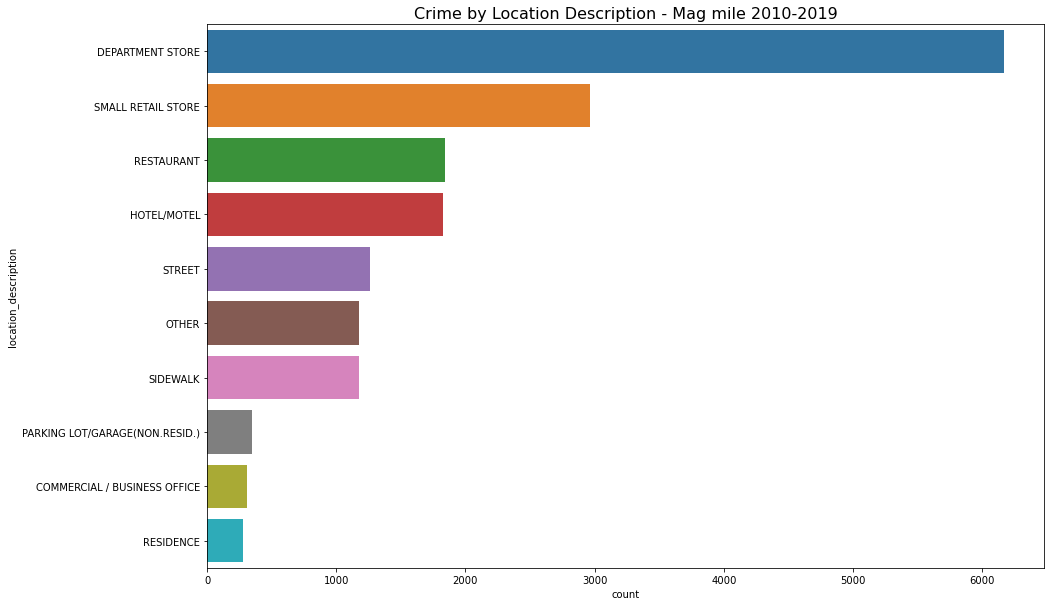

In [33]:
# Bar plot - crime by location

plt.figure(figsize = (15, 10))
sns.countplot(y= 'location_description', data = dataf, order = dataf['location_description'].value_counts().iloc[:10].index)
plt.title('Crime by Location Description - Mag mile 2010-2019', fontsize=16)
plt.savefig(".\output\\" + "Crime_Location.png")

In [34]:
#Crime type by primary type = Theft

df_theft = dataf[dataf['primary_type'] == 'THEFT']

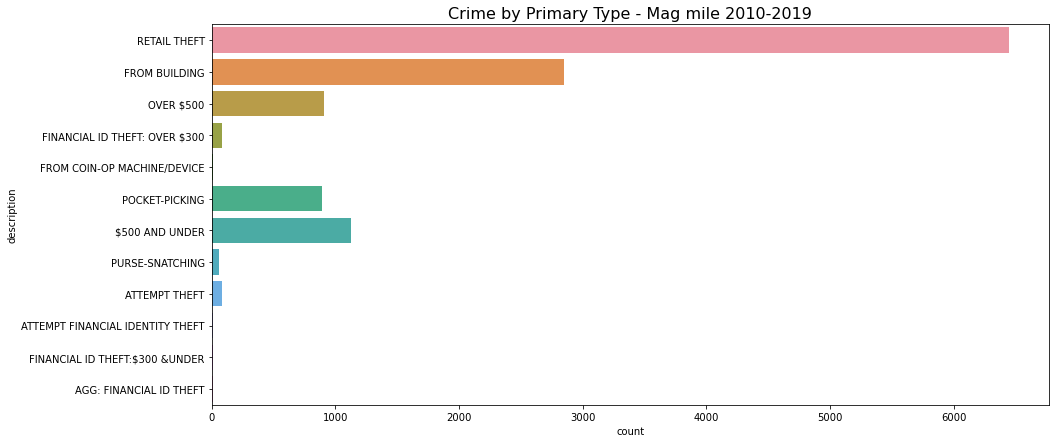

In [35]:
#Bar plot primary type = Theft

plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['description'])
plt.title('Crime by Primary Type - Mag mile 2010-2019', fontsize=16)
plt.savefig(".\output\\" + "Crime_Primary_Type_Theft.png")


In [36]:
# Generate a pie plot using pandas

crime_df = pandas.DataFrame(dataf.groupby(["primary_type"]).count()).reset_index()[:5]
crime_df.head()

,primary_type,id,date,description,location_description,year,latitude,longitude,location
0,ARSON,2,2,2,2,2,2,2,2
1,ASSAULT,414,414,414,414,414,414,414,414
2,BATTERY,1024,1024,1024,1024,1024,1024,1024,1024
3,BURGLARY,90,90,90,90,90,90,90,90
4,CONCEALED CARRY LICENSE VIOLATION,1,1,1,1,1,1,1,1


In [37]:
#Alter the dataframe down to two columns
crime_df = crime_df[["primary_type","description"]]
crime_df.head()

,primary_type,description
0,ARSON,2
1,ASSAULT,414
2,BATTERY,1024
3,BURGLARY,90
4,CONCEALED CARRY LICENSE VIOLATION,1


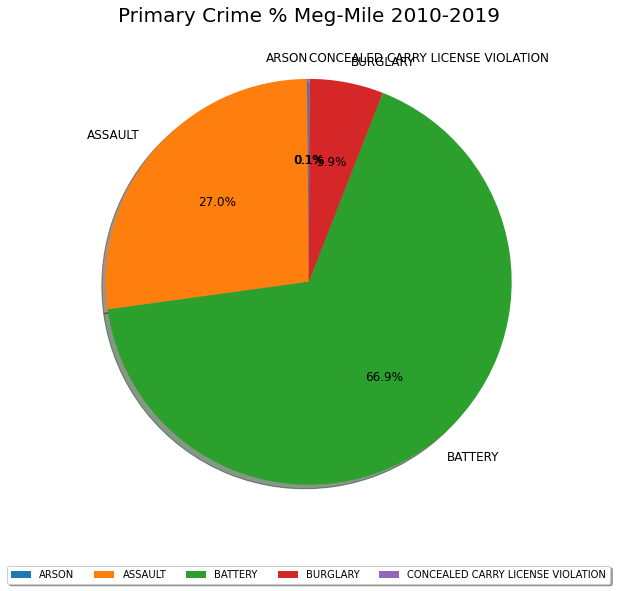

In [38]:
# pie plot using pandas

plt.figure(figsize=(20,15))
ax1 = plt.subplot(121, aspect="equal")
crime_df.plot(kind="pie", y = "description", ax=ax1, autopct='%1.1f%%',startangle=90, shadow=True, 
              labels=crime_df["primary_type"], legend = False, fontsize=12)

plt.title("Primary Crime % Meg-Mile 2010-2019", fontsize=20)
plt.xlabel("")
plt.ylabel("")
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.savefig(".\output\\" + "Pie_Crime_Type.png")